<h1> Netflix Movies And TV-show </h1>

In [ ]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv(r'C:\Users\mohit\Downloads\archive\netflix_titles.csv')

In [3]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [4]:
data.shape

(7787, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<p> As we can clearly see that there are lot of missing values in the director,cast and country columns. so i have to drop
some of the columns if possible. I have dropped director column because it's not possible to fill the director column,same for the
cast column. 
For country column i should find the mode and assign the mode value where is null. </p>

In [7]:
data.drop(columns=['cast'],inplace=True)

In [8]:
data.shape

(7787, 11)

In [9]:
data.country.fillna(data.country.mode()[0],inplace=True)

In [10]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
data.date_added.fillna(data.date_added.mode()[0],inplace=True)
data.rating.fillna(data.rating.mode()[0],inplace=True)

In [107]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
add_year           0
add_month          0
country_main       0
dtype: int64

In [ ]:
data.drop(columns=['director'])

<p> Now all the missing values in the dataset have been removed or managed. </p>

In [108]:
 data.duplicated().sum() # No duplicate values in the dataset 

0

<p> so,In the conclusion no missing value in the dataset </p>

<p> Adding some new columns in this dataset </p>

In [15]:
data['add_year']=data['date_added'].apply(lambda x:x.split(',')[1])
or 
#data['add_year']=pd.DatetimeIndex(data['date_added']).year  

#For this make sure that date_added column type should be datetime if not use this 
# data['date_added']=pd.to_datetime(data['date_added'])


In [17]:
data['add_month']=data['date_added'].apply(lambda x:x.split(' ')[0])

#data['add_month']=pd.DatetimeIndex(data['date_added']).month  

In [21]:
#Only main countries are in this column
data['country_main']=data['country'].apply(lambda x: x.split(',')[0])

In [23]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,add_year,add_month,country_main
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Mexico


In [24]:
# Now making two dataframes for TV Show and Movie

tv = data[data.type=="TV Show"]
movie = data[data.type=="Movie"]

In [111]:
tv.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,add_year,add_month,country_main
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Brazil
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July,Turkey


In [112]:
movie.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,add_year,add_month,country_main
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Singapore


In [113]:
X = data.type.value_counts().reset_index()
X

,index,type
0,Movie,5377
1,TV Show,2410


<h2> Movie and Tv show -Percentage in above data </h2>

In [115]:
#Now plotted the above information in a pie chart
fig = px.pie(X, values='type', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()


<h2>Movies and Tv-show - Based on countries </h2>

In [31]:
#Now let's do this with some other comparison like country
country_data= data.country_main.value_counts().reset_index()

country_data=country_data[country_data['country_main']/country_data['country_main'].sum()>0.01]
fig = px.pie(country_data, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()


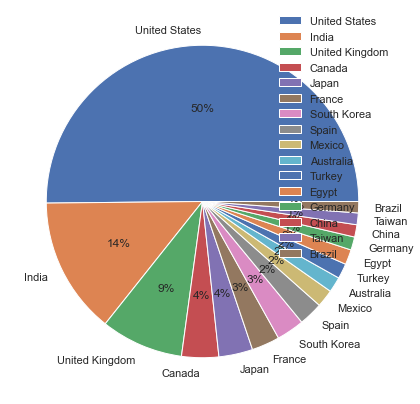

In [49]:
#Also we can use same thing using matplotlib library
plt.figure(figsize=(7,10))
plt.pie(country_data['country_main'],autopct='%1.00f%%',labels=country_data['index'])
plt.legend(loc='upper right',frameon=False,shadow=True,fancybox=True)
plt.show()

In [122]:
movie_data=movie.add_year.value_counts().reset_index()
movie_data

,index,add_year
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


<h2> Number of Movies-Based on year </h2>

In [119]:
#Now let's do this with some other comparison like country
#using px library
fig = px.pie(movie_data, values='add_year', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()


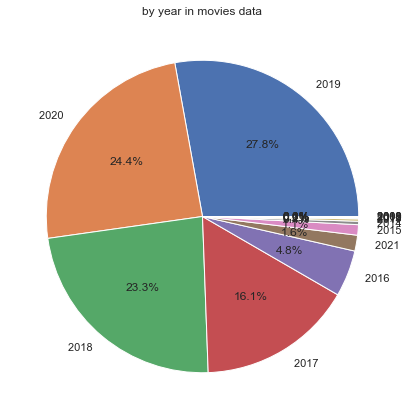

In [123]:
#using matplotlib library
movie_data=movie.add_year.value_counts().reset_index()
movie_data
plt.figure(figsize=(7,10))
plt.title('by year in movies data')
plt.pie(movie_data.add_year,labels=movie_data['index'],autopct='%1.1f%%',)
plt.show()

<h2> Number of Tv-show- Based on year </h2>

In [121]:
#Now let's do this with some other comparison like country
#using px library
fig = px.pie(tv_data, values='add_year', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()


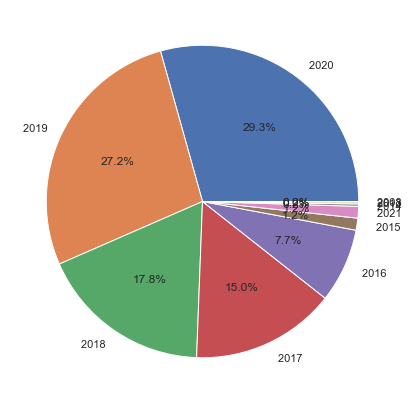

In [124]:
tv_data=tv.add_year.value_counts().reset_index()
tv_data
plt.figure(figsize=(7,10))
plt.pie(tv_data.add_year,labels=tv_data['index'],autopct='%1.1f%%')
plt.show()

<h2>Most content on netflix based on countries</h2>

In [128]:
#Most of the content on netflix based on the countries
fig = px.histogram(data, x='country_main',color_discrete_sequence=['indianred'],title='Most content on netflix based on countries',labels=['country','country_count'])
fig.update_xaxes(categoryorder='total ascending')
fig.show()

<h2> data based on -Duration of movies </h2>

In [134]:
 new_df = movie.groupby(['duration']).agg({'show_id': 'count'}).reset_index()

In [129]:
new_df.head(2)

,country_main,show_id
0,Argentina,68
1,Australia,108


<AxesSubplot:xlabel='duration', ylabel='show_id'>

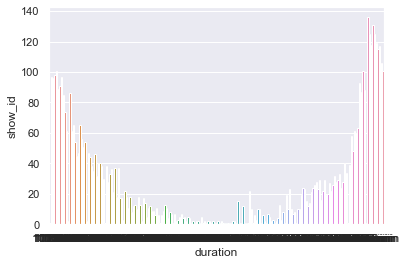

In [76]:
#using seaborn library
sns.barplot(new_df['duration'],new_df['show_id'])

In [137]:

fig = px.bar(x=new_df['duration'], y = new_df['show_id'],title='data Based on duration')
fig.update_traces(marker = dict(color= 'green'))

fig.update_xaxes(type='category',categoryorder='total ascending')

fig.show()

In [82]:
 new_tv = tv.groupby(['duration']).agg({'show_id': 'count'}).reset_index()

In [139]:
fig = px.bar(x=new_tv['duration'], y = new_tv['show_id'],title='Tv -Based on duration')
fig.update_traces(marker = dict(color= 'green'))

fig.update_xaxes(type='category',categoryorder='total ascending')

fig.show()

In [141]:
#According to the country in tv_series_data
tv_series=tv.country_main.value_counts().reset_index()
fig = px.pie(tv_series, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu,title='Most Tv-series Released based on countries')
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()


In [142]:
#According to the country in tv_series_data
movies_data=movie.country_main.value_counts().reset_index()
fig = px.pie(movies_data, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu,title='Most Movies released based on countries')
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width =2)))
fig.show()
